https://www.datacamp.com/courses/statistical-thinking-in-python-part-1
# 1. The sample mean and median
- outliers: data points whose value is far greater or less than most of the rest of the data

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
swing = pd.read_csv('datasets/2008_swing_states.csv')
swing.head(3)

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07


In [22]:
swing.columns

Index(['state', 'county', 'total_votes', 'dem_votes', 'rep_votes',
       'dem_share'],
      dtype='object')

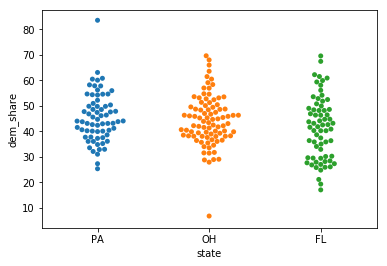

In [26]:
sns.swarmplot(x='state', y='dem_share', data=swing)
plt.show()

In [10]:
pa = swing[swing['state']=='PA']
pa.head(3)

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07


In [29]:
np.mean(pa)

total_votes    89479.656716
dem_votes      48900.940299
rep_votes      39640.074627
dem_share         45.476418
dtype: float64

In [31]:
np.median(pa.dem_share)

44.03

# 2. Percentiles, outliers, and box plots

In [34]:
np.percentile(swing.dem_share, [25])

array([37.3025])

In [35]:
np.percentile(swing.dem_share, [25, 50, 75])

array([37.3025, 43.185 , 49.925 ])

In [36]:
election = pd.read_csv('datasets/2008_all_states.csv')
election.head(3)

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west


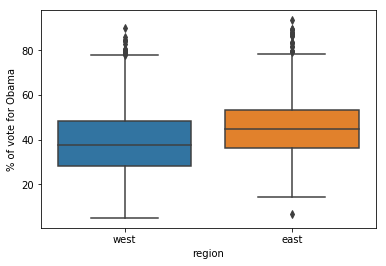

In [44]:
sns.boxplot(x='east_west', y='dem_share', data=election)
plt.xlabel('region')
plt.ylabel('% of vote for Obama')
plt.show()

In [64]:
iris = pd.read_csv('datasets/Iris.csv')
iris.head(3)

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [65]:
vers = iris[iris['Species']=='Iris-versicolor']
vers.head(3)

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor


In [66]:
x_vers = np.sort(vers.PetalLength)
x_vers

array([3. , 3.3, 3.3, 3.5, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4. , 4. ,
       4. , 4. , 4. , 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4,
       4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6,
       4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.9, 4.9, 5. , 5.1])

In [71]:
y_vers = np.arange(1, 1+len(x_vers))/len(x_vers)
y_vers

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

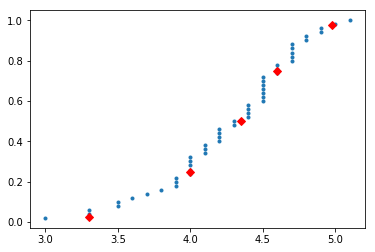

In [104]:
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
percentile_list = [2.5, 25, 50, 75, 97.5]
plt.plot(np.percentile(vers.PetalLength, percentile_list), np.array(percentile_list)/100, marker='D', color='red', linestyle='none')
plt.show()

In [101]:
# to turn list into numpy arrays
np.array(percentile_list)/100

array([0.025, 0.25 , 0.5  , 0.75 , 0.975])

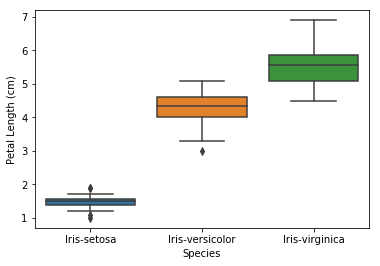

In [108]:
sns.boxplot(x='Species', y='PetalLength', data=iris)
plt.ylabel('Petal Length (cm)')
plt.show()

# 3. Variance and standard deviation
## Variance: the mean squared distance of the data from their mean. It's a measure of the spread of data

In [109]:
election.head(3)

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west


In [111]:
fl = election[election['state']=='FL']
fl.head(3)

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
2950,FL,Jackson County,21565,7671,13717,177,35.86,east
2952,FL,Escambia County,154447,61572,91411,1464,40.25,east
2953,FL,Santa Rosa County,76185,19470,55972,743,25.81,east


In [113]:
np.var(fl.dem_share)

147.44278618846064

In [114]:
np.sqrt(np.var(fl.dem_share))

12.142602117687158

In [115]:
np.std(fl.dem_share)

12.142602117687158

# 4. Covariance and the Pearson correlation coefficient
## Covariance: a measure of how 2 quantities vary together.

In [116]:
swing.head(3)

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07


In [122]:
np.array(swing['total_votes'])/1000

array([127.691,  25.787,  17.984,  15.947,   7.507,  22.835,  19.286,
        18.517,  44.874, 121.335,  38.134, 219.83 ,  21.973,  51.102,
        18.397,  13.138, 107.876,  14.271,   2.444,  23.307,  41.229,
        65.022,   2.245,  24.284,  49.237,   3.12 , 146.859, 106.911,
        53.821,  14.84 ,  14.791,  17.766, 135.175,  19.195,  18.802,
        78.206,  28.063,  25.582,  90.451,  27.449,  33.813,  75.763,
        68.443,   9.769,  33.939,   8.023,  90.425,  30.081,  36.981,
        18.68 ,  17.4  , 127.032,  26.923,  42.103,  25.168,  21.173,
        61.122,  10.977,  52.142,  14.652, 187.545, 135.587,  63.057,
        48.487,  50.263,  37.302,  15.479,  84.488,  16.502,  13.114,
       152.473,  18.632,  53.102,  13.953,  21.271,  65.67 ,  16.643,
        29.017,   9.711,  23.486, 176.873, 180.   , 651.436,  11.113,
        42.95 , 129.529,  19.745, 332.924,  35.939,  28.231,  58.297,
        22.217,  24.928,  23.668,  98.047,  16.863, 422.419,  92.416,
         7.787,  25.

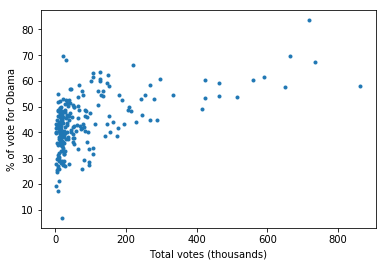

In [129]:
plt.plot(np.array(swing.total_votes)/1000, swing.dem_share, marker='.', linestyle='none')
plt.xlabel('Total votes (thousands)')
plt.ylabel('% of vote for Obama')
plt.show()

# Practice 4
## np.cov(x, y)

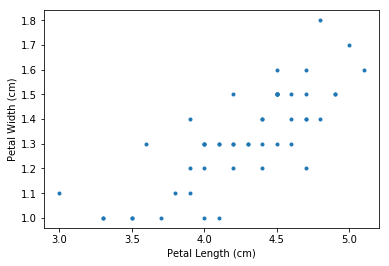

In [133]:
plt.plot(vers.PetalLength, vers.PetalWidth, marker='.', linestyle='none')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

In [134]:
np.cov(vers.PetalLength, vers.PetalWidth)

array([[0.22081633, 0.07310204],
       [0.07310204, 0.03910612]])

In [135]:
np.cov(vers.PetalLength, vers.PetalWidth)[0,1]

0.07310204081632653

In [146]:
def f(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    a = np.corrcoef(x, y) # Compute correlation matrix: a
    return a[0,1] # Return entry [0,1]

r = f(vers.PetalLength, vers.PetalWidth) # Compute Pearson correlation coefficient for I. versicolor: r
r

0.7866680885228169